# SARIMA 

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
data = pd.read_csv('dataset/msavi_msavi_3years_filtered.csv')
data = data.drop(data.columns[0], axis=1)
data = data.drop(data.columns[2], axis=1)

data.head()

,msavi_value,date
0,0.000167,2020-02-03
1,0.000220,2020-02-03
2,0.000182,2020-02-03
3,0.000160,2020-02-03
4,0.000165,2020-02-03


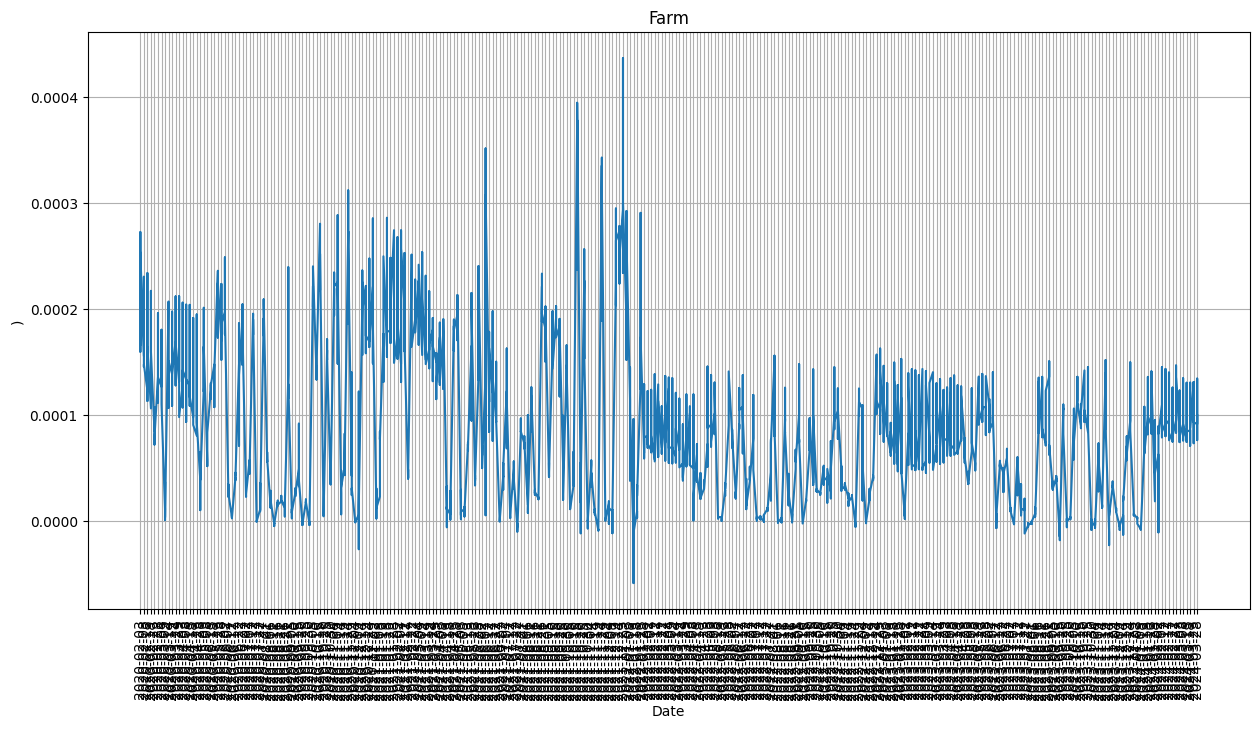

In [6]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['date'], data['msavi_value'])
plt.title('Farm')
plt.ylabel(')')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

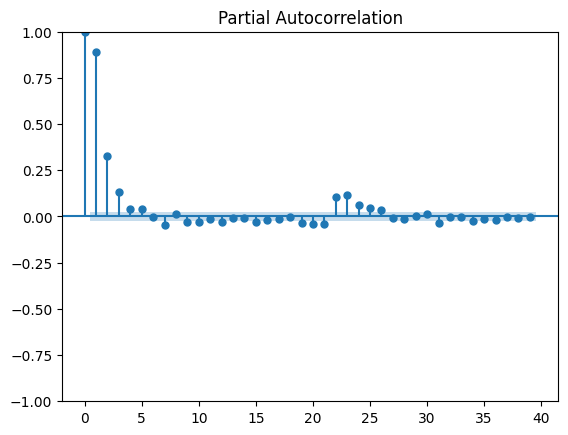

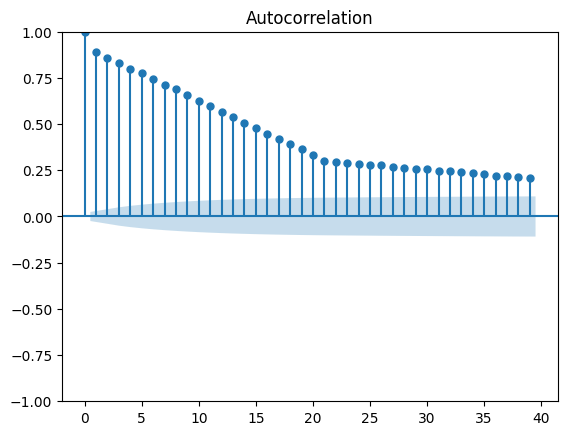

In [7]:
plot_pacf(data['msavi_value']);
plot_acf(data['msavi_value']);

In [8]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(data['msavi_value'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.399367167254132
p-value: 2.2531348067979893e-13


In [9]:
# Take the log difference to make data stationary

#data['msavi_value'] = np.log(data['msavi_value'])
#data['msavi_value'] = data['msavi_value'].diff()
data = data.drop(data.index[0])

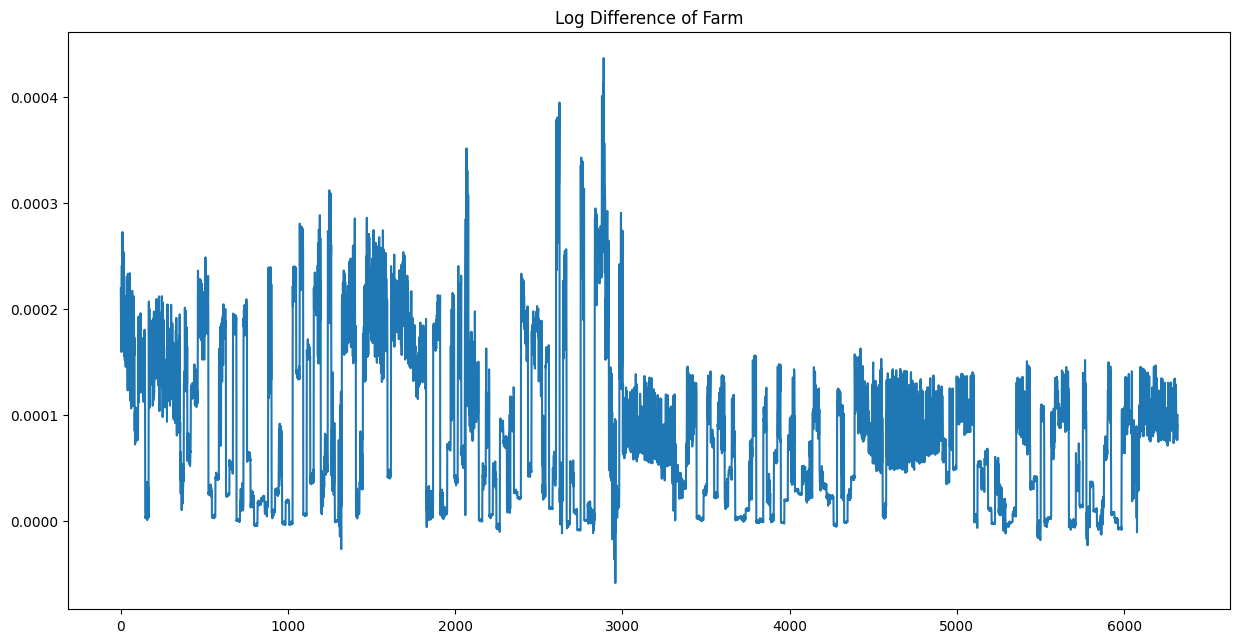

In [10]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['msavi_value'])
plt.title("Log Difference of Farm")
plt.show()

In [11]:
# Seasonal differencing

#data['msavi_value'] = data['msavi_value'].diff(4)
#data = data.drop([1, 2, 3, 4], axis=0).reset_index(drop=True)


data.head()

,msavi_value,date
1,0.000220,2020-02-03
2,0.000182,2020-02-03
3,0.000160,2020-02-03
4,0.000165,2020-02-03
5,0.000174,2020-02-03


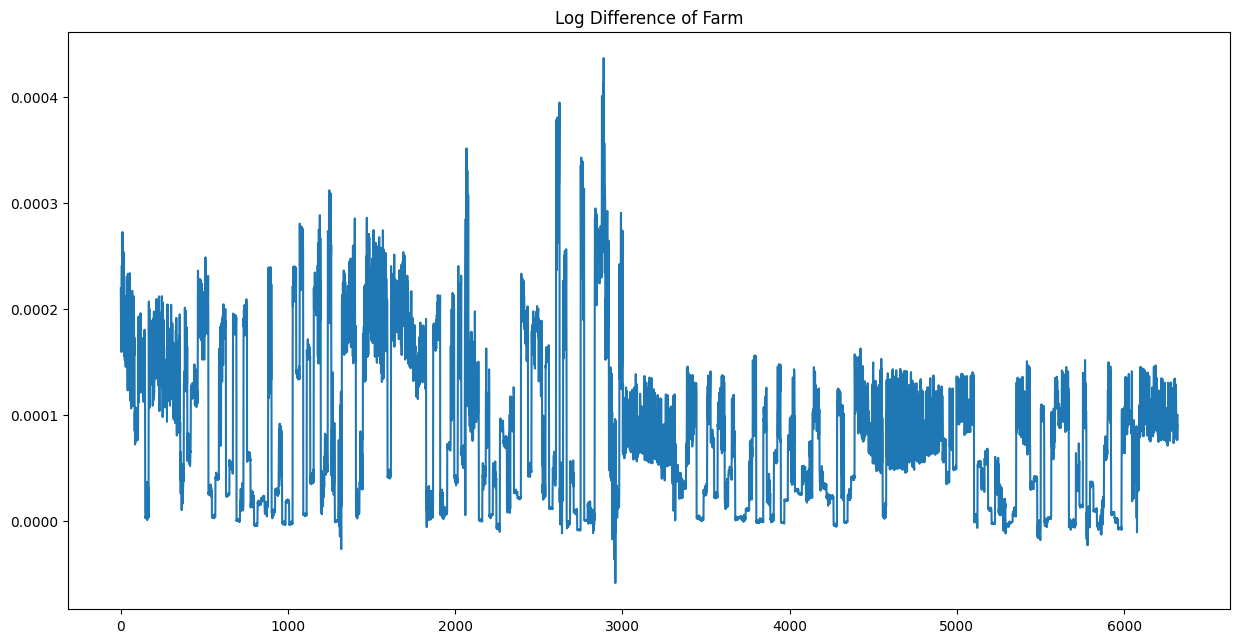

In [12]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['msavi_value'])
plt.title("Log Difference of Farm")
plt.show()

In [13]:
# Remove infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove NaN values
data.dropna(subset=['msavi_value'], inplace=True)

# Now you can perform the Augmented Dickey-Fuller test
ad_fuller_result = adfuller(data['msavi_value'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.40668465815407
p-value: 2.1581495026798392e-13


In [14]:
# Augmented Dickey-Fuller test

ad_fuller_result = adfuller(data['msavi_value'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -8.40668465815407
p-value: 2.1581495026798392e-13


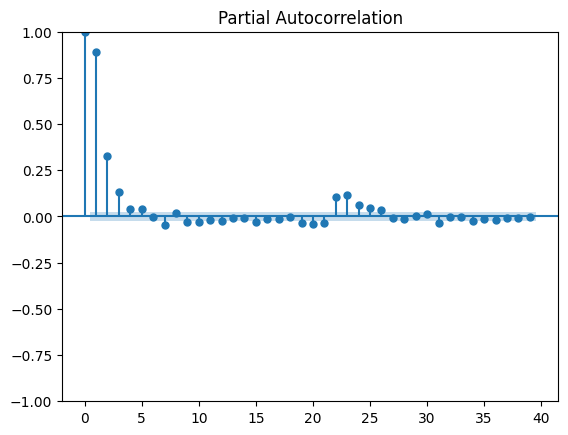

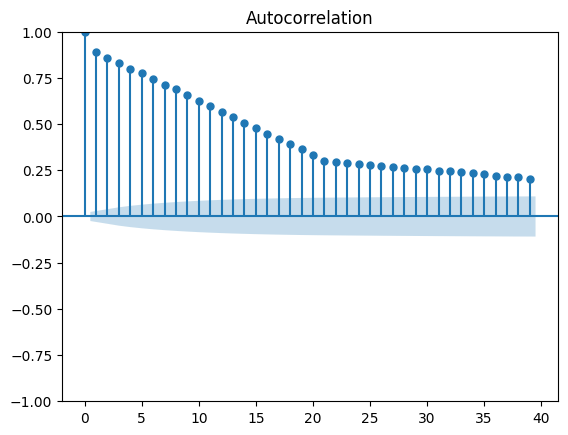

In [15]:
plot_pacf(data['msavi_value']);
plot_acf(data['msavi_value']);

In [16]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [17]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 5

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [18]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 5, data['msavi_value'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
best_model = SARIMAX(data['msavi_value'], order=(0, 1, 2), seasonal_order=(0, 1, 2, 4)).fit(dis=-1)
print(best_model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15171D+00    |proj g|=  6.30485D-01

At iterate    5    f=  8.92936D-01    |proj g|=  5.86810D-02

At iterate   10    f=  8.26108D-01    |proj g|=  3.16227D-02

At iterate   15    f=  7.98723D-01    |proj g|=  7.54403D-02

At iterate   20    f=  7.92561D-01    |proj g|=  2.69045D-02
  ys=-9.776E-05  -gs= 1.121E-04 BFGS update SKIPPED

At iterate   25    f=  7.92365D-01    |proj g|=  1.96815D-03

At iterate   30    f=  7.92364D-01    |proj g|=  1.88458D-03

At iterate   35    f=  7.92363D-01    |proj g|=  9.91159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

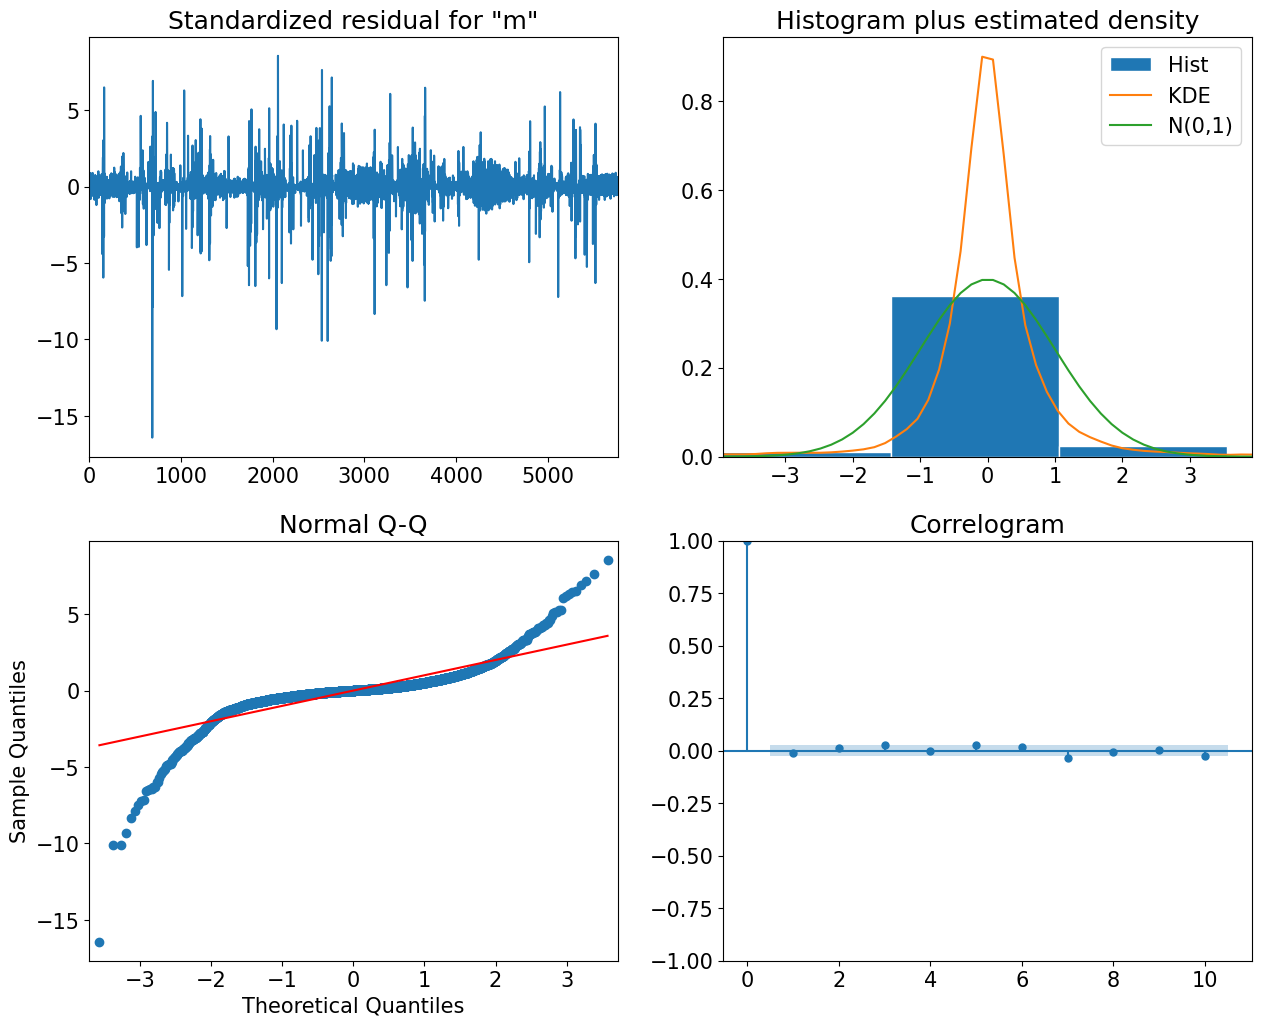

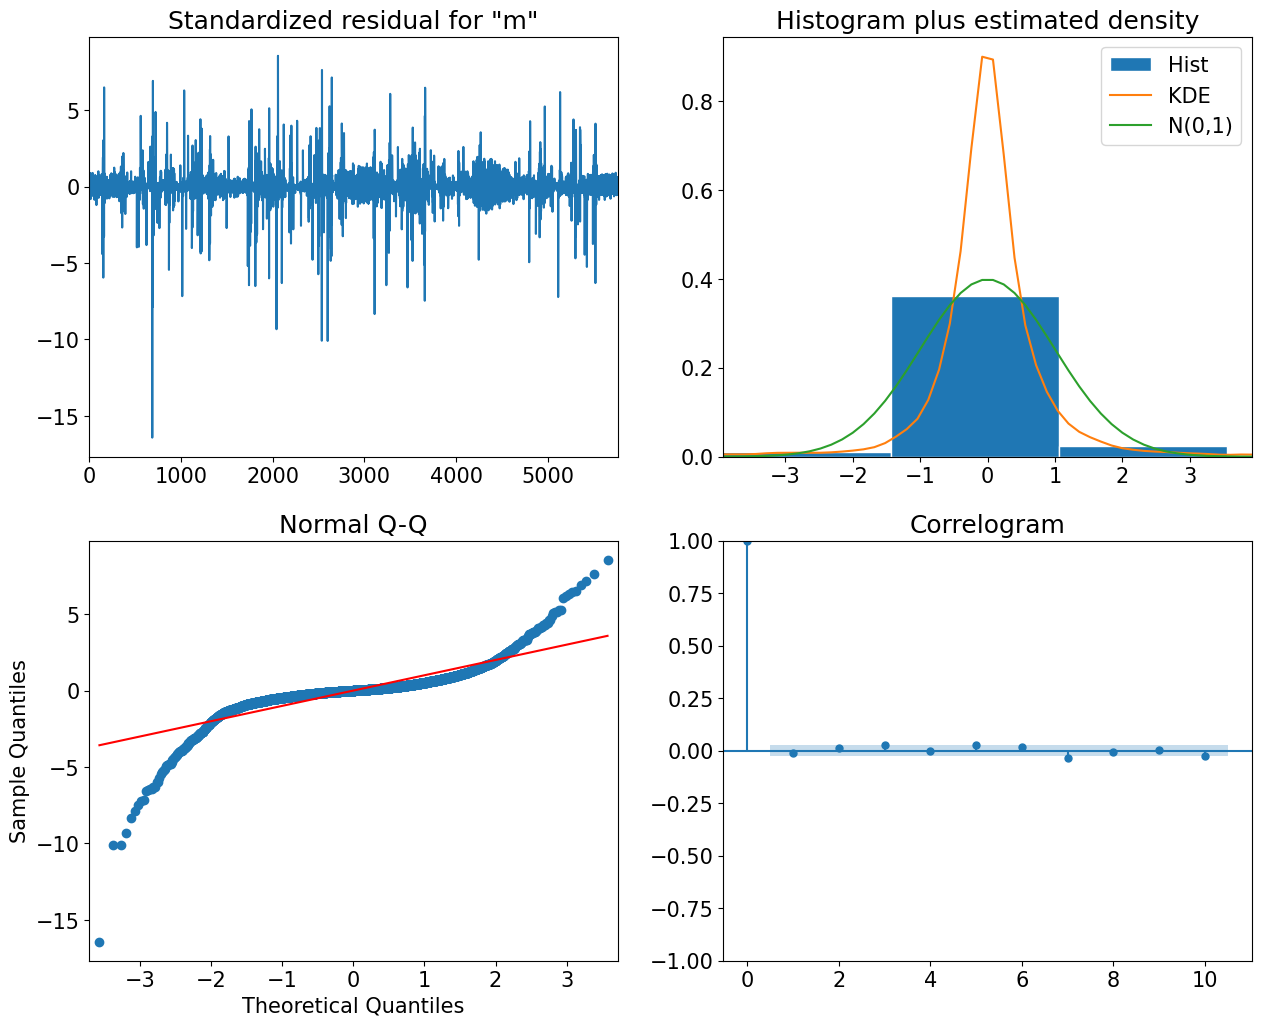

In [ ]:
best_model.plot_diagnostics(figsize=(15,12))

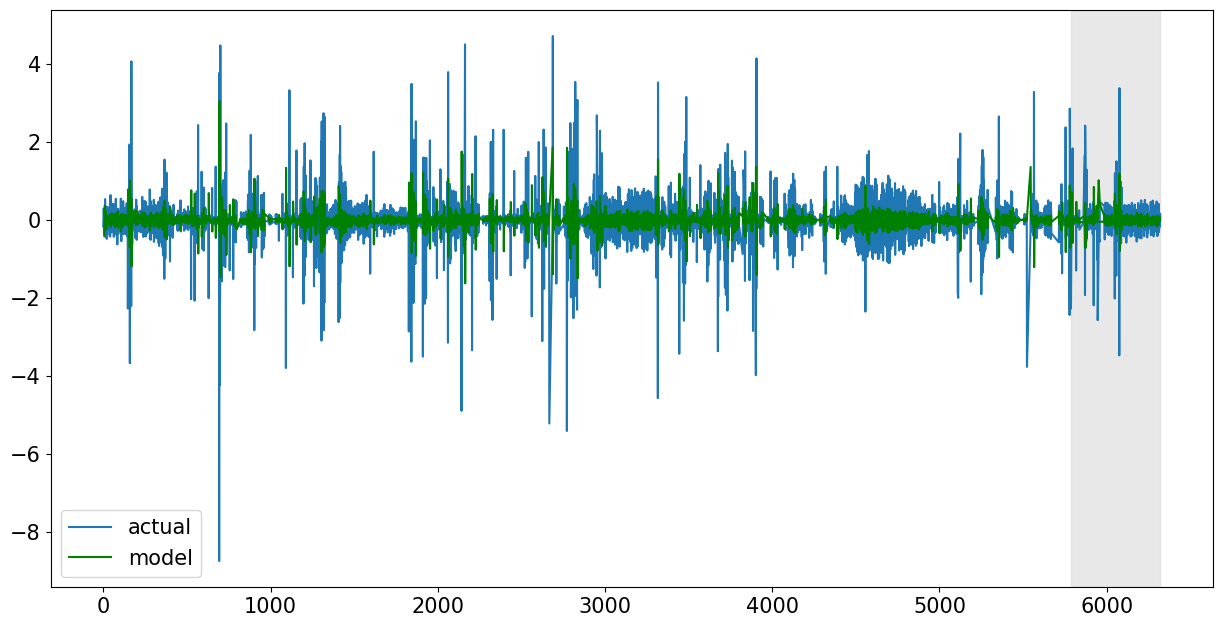

In [ ]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:4+1] = np.NaN

forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 20)
forecast = pd.concat([data['arima_model'], forecast])

plt.figure(figsize=(15, 7.5))

plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['msavi_value'], label='actual')
plt.plot(forecast, color='g', label='model')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(100, 15))
import matplotlib.dates as mdates
date_formater = mdates.DateFormatter('%m/%d/%Y')
plt.rcParams.update({'font.size': 15})
plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="MSAVI_mean")

# Plot the ARIMA forecast in the same figure
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 20)
forecast = pd.concat([data['arima_model'], forecast])
forecast.plot(color='g', label='ARIMA Forecast')

plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_formatter(date_formater)
ax.set_title(forecast.item_id)
plt.gcf().tight_layout()
plt.legend()
plt.show()

NameError: name 'ts' is not defined

<Figure size 10000x1500 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'msavi_value' is the actual data and 'arima_model' is the predicted data
data = data.dropna(subset=['msavi_value', 'arima_model'])
data = data.reset_index(drop=True)
actual = data['msavi_value']
predicted = data['arima_model']

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)  # or mse**(0.5)  
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.28370359122532884
MSE: 0.28522537922299984
RMSE: 0.5340649578684225
MAPE: 348.44035560610916%


In [ ]:
data = data.dropna(subset=['msavi_value', 'arima_model'])
actual = data['msavi_value']
predicted = data['arima_model']

In [ ]:
data = pd.read_csv('dataset/msavi_msavi_3years_filtered.csv')
data = data.drop(data.columns[0], axis=1)
data = data.drop(data.columns[2], axis=1)
data.shape

(6321, 2)

In [ ]:
train, test = data.iloc[:1500,:], data.iloc[1500:,:]

In [ ]:
model = ExponentialSmoothing(train['msavi_value']).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])